In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [3]:
data = pd.read_csv('France_spc.csv')

In [3]:
data


,Unnamed: 0,500,502,504,506,508,510,512,514,516,...,2480,2482,2484,2486,2488,2490,2492,2494,2496,2498
0,10000,0.137399,0.139045,0.140758,0.142544,0.144388,0.146281,0.148221,0.150205,0.152239,...,0.380845,0.379886,0.378946,0.378047,0.377186,0.376361,0.375612,0.374935,0.374315,0.373759
1,10001,0.141740,0.142851,0.144007,0.145208,0.146450,0.147726,0.149025,0.150348,0.151702,...,0.261258,0.260330,0.259418,0.258505,0.257603,0.256744,0.255934,0.255173,0.254467,0.253815
2,10002,0.140713,0.142216,0.143778,0.145392,0.147053,0.148756,0.150488,0.152257,0.154059,...,0.402253,0.401367,0.400499,0.399693,0.398964,0.398307,0.397749,0.397298,0.396927,0.396609
3,10004,0.128922,0.129908,0.130919,0.131959,0.133019,0.134102,0.135196,0.136307,0.137433,...,0.331686,0.331122,0.330591,0.330075,0.329612,0.329210,0.328841,0.328509,0.328244,0.328046
4,10005,0.161760,0.163229,0.164741,0.166298,0.167895,0.169530,0.171194,0.172890,0.174611,...,0.404026,0.403154,0.402350,0.401604,0.400916,0.400319,0.399808,0.399354,0.398933,0.398586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2802,9994,0.175727,0.178053,0.180468,0.182962,0.185521,0.188140,0.190804,0.193521,0.196278,...,0.459346,0.458799,0.458305,0.457847,0.457396,0.456953,0.456555,0.456244,0.456026,0.455895
2803,9995,0.125521,0.126836,0.128200,0.129611,0.131063,0.132553,0.134079,0.135646,0.137254,...,0.428368,0.427798,0.427246,0.426737,0.426303,0.425913,0.425548,0.425225,0.424973,0.424812
2804,9996,0.132677,0.134059,0.135492,0.136976,0.138502,0.140069,0.141675,0.143321,0.145009,...,0.398695,0.398189,0.397701,0.397237,0.396807,0.396417,0.396091,0.395835,0.395633,0.395486
2805,9997,0.152170,0.153704,0.155295,0.156942,0.158638,0.160379,0.162153,0.163965,0.165812,...,0.396800,0.395874,0.395001,0.394189,0.393430,0.392743,0.392145,0.391597,0.391107,0.390716


In [4]:
data = data.drop(columns=['Unnamed: 0'])

In [5]:
target = pd.read_csv('France_lab.csv')

In [6]:
target 

,Unnamed: 0,SAMPLE_ID,CLAY,SILT,SAND,SOC,CaCO3,N,P,K,CEC,GPS_PROJ,GPS_LAT,GPS_LONG,LC1,LC2,LU1,LU2,MINERAL,COUNTRY
0,1,10000,40.0,52.0,8.0,15.6,1,1.4,42.6,491.1,24.6,WGS84,45.893933,4.680379,B82,E10,U111,8,mineral,FRANCE
1,2,10001,26.0,18.0,56.0,19.8,1,1.6,19.5,279.1,20.6,WGS84,45.816720,4.584692,E10,8,U370,8,mineral,FRANCE
2,3,10002,22.0,41.0,37.0,33.5,1,2.6,37.8,399.1,15.0,WGS84,45.983716,4.671533,E10,8,U111,8,mineral,FRANCE
3,4,10004,27.0,47.0,26.0,66.1,21,6.6,147.7,1080.6,30.5,WGS84,45.908022,4.601575,E10,8,U111,8,mineral,FRANCE
4,5,10005,16.0,32.0,52.0,38.1,0,2.6,49.6,293.9,7.8,WGS84,46.082345,4.480490,E20,8,U111,8,mineral,FRANCE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2802,2803,9994,19.0,62.0,19.0,9.1,0,1.2,44.5,131.8,9.7,WGS84,45.615242,4.887293,B31,8,U111,8,mineral,FRANCE
2803,2804,9995,16.0,41.0,42.0,13.4,0,1.4,33.0,184.4,7.2,WGS84,45.713629,5.058028,B16,8,U111,8,mineral,FRANCE
2804,2805,9996,13.0,29.0,58.0,8.7,3,1.3,104.9,425.4,7.7,WGS84,45.767539,5.053155,B16,8,U111,8,mineral,FRANCE
2805,2806,9997,20.0,38.0,42.0,30.6,0,3.0,56.1,107.8,12.6,WGS84,45.788303,4.381513,E20,8,U111,8,mineral,FRANCE


In [6]:
target = target['SOC']

In [7]:
target

0       15.6
1       19.8
2       33.5
3       66.1
4       38.1
        ... 
2802     9.1
2803    13.4
2804     8.7
2805    30.6
2806     5.9
Name: SOC, Length: 2807, dtype: float64

n_components: 1, RMSE: 23.2679
n_components: 21, RMSE: 15.4862
n_components: 41, RMSE: 14.6992
n_components: 61, RMSE: 14.7346
n_components: 81, RMSE: 15.1608
n_components: 101, RMSE: 15.6868
n_components: 121, RMSE: 16.3161
n_components: 141, RMSE: 16.8555
n_components: 161, RMSE: 17.3259
n_components: 181, RMSE: 17.6918
Rough estimate of optimal number of components: 41


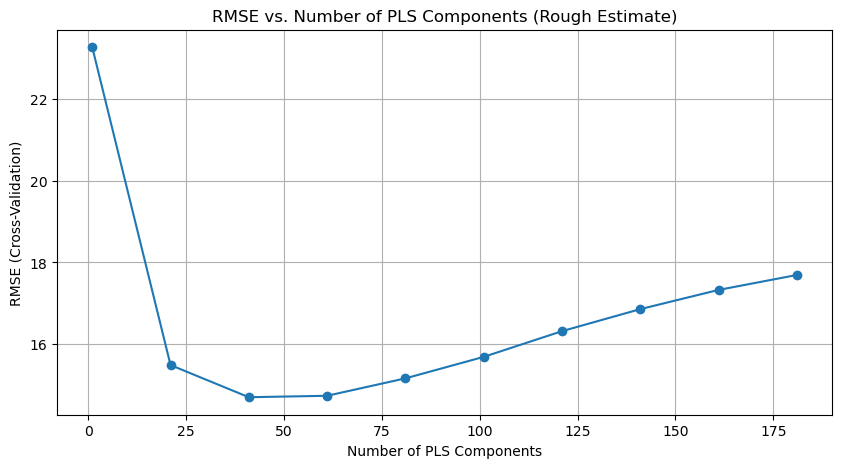

In [ ]:
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('France_spc.csv');
data = data.drop(columns=['Unnamed: 0'])

target = pd.read_csv('France_lab.csv');
target = target['SOC'];

# Extract features and target
X = data.values
y = target.values





# Apply Savitzky-Golay smoothing filter
def apply_savitzky_golay(X, window_length=11, polyorder=2, deriv=0, delta=2):
    smoothed_X = savgol_filter(X, window_length=window_length, polyorder=polyorder, deriv=deriv, delta=delta, axis=0)
    return smoothed_X

# Apply Standard Normal Variate (SNV) transformation
def standard_normal_variate(X):
    snv_X = (X - np.mean(X, axis=1, keepdims=True)) / np.std(X, axis=1, keepdims=True)
    return snv_X

# Optionally apply Savitzky-Golay filter and SNV transformation
X_sg = apply_savitzky_golay(X, window_length=11, polyorder=2, deriv=0, delta=2)
X_snv = standard_normal_variate(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_snv)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Function to calculate RMSE using cross-validation
def calculate_rmse(n_components, X_train, y_train):
    pls = PLSRegression(n_components=n_components)
    # Use negative mean squared error as cross-validation scoring
    mse = cross_val_score(pls, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-mse).mean()  # Take square root of MSE and average it across folds
    return rmse

# Test a range of n_components in larger increments
component_step = 20  # Test every 20 components for efficiency
max_components = min(X_train.shape[0], X_train.shape[1], 200)  # Ensure we don't test more components than features or samples
rmse_scores = []

for n in range(1, max_components + 1, component_step):
    rmse = calculate_rmse(n, X_train, y_train)
    rmse_scores.append((n, rmse))
    print(f'n_components: {n}, RMSE: {rmse:.4f}')

# Extract n_components and RMSE values
components_tested = [x[0] for x in rmse_scores]
rmse_values = [x[1] for x in rmse_scores]

# Find the range of n_components with the lowest RMSE
optimal_n_rough = components_tested[np.argmin(rmse_values)]
print(f'Rough estimate of optimal number of components: {optimal_n_rough}')

# Plot RMSE vs. number of components (in steps)
plt.figure(figsize=(10, 5))
plt.plot(components_tested, rmse_values, marker='o')
plt.xlabel('Number of PLS Components')
plt.ylabel('RMSE (Cross-Validation)')
plt.title('RMSE vs. Number of PLS Components (Rough Estimate)')
plt.grid(True)
plt.show()


n_components: 31, RMSE: 15.0433
n_components: 32, RMSE: 15.0220
n_components: 33, RMSE: 14.9593
n_components: 34, RMSE: 14.8589
n_components: 35, RMSE: 14.8149
n_components: 36, RMSE: 14.7800
n_components: 37, RMSE: 14.7262
n_components: 38, RMSE: 14.7075
n_components: 39, RMSE: 14.6918
n_components: 40, RMSE: 14.6722
n_components: 41, RMSE: 14.6992
n_components: 42, RMSE: 14.7189
n_components: 43, RMSE: 14.7127
n_components: 44, RMSE: 14.7119
n_components: 45, RMSE: 14.7328
n_components: 46, RMSE: 14.7184
n_components: 47, RMSE: 14.7453
n_components: 48, RMSE: 14.7137
n_components: 49, RMSE: 14.7303
n_components: 50, RMSE: 14.6941
Fine-tuned optimal number of components: 40


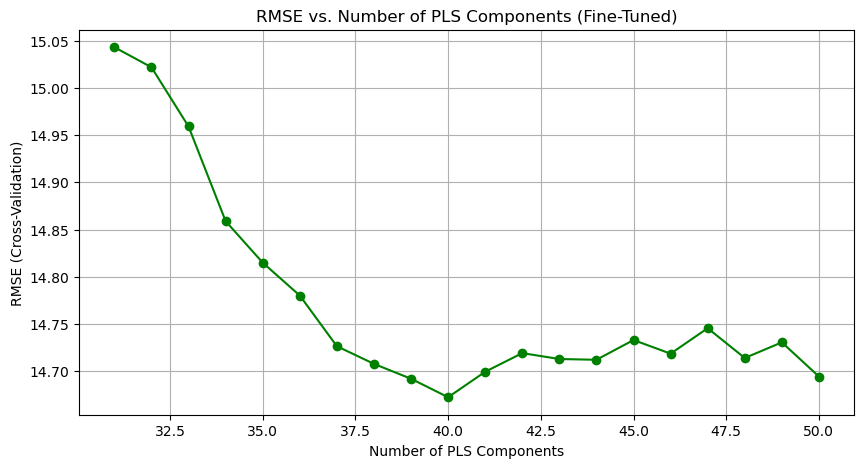

Root Mean Squared Error (RMSE) on test set: 11.4503
Correlation coefficient: 0.8132


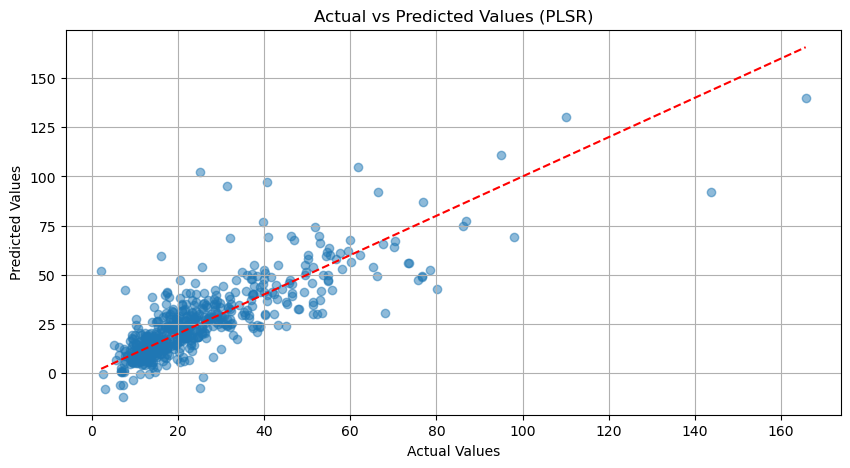

In [26]:
# Now fine-tune around the rough estimate
optimal_n_rough = 41

fine_tune_range = list(range(max(1, optimal_n_rough - 10), min(max_components, optimal_n_rough + 10)))

fine_rmse_scores = []

for n in fine_tune_range:
    rmse = calculate_rmse(n, X_train, y_train)
    fine_rmse_scores.append((n, rmse))
    print(f'n_components: {n}, RMSE: {rmse:.4f}')

# Extract refined n_components and RMSE values
fine_components_tested = [x[0] for x in fine_rmse_scores]
fine_rmse_values = [x[1] for x in fine_rmse_scores]

# Find the optimal number of components with the lowest RMSE in the fine-tuned range
optimal_n_fine = fine_components_tested[np.argmin(fine_rmse_values)]
print(f'Fine-tuned optimal number of components: {optimal_n_fine}')

# Plot RMSE vs. number of components (fine-tuned)
plt.figure(figsize=(10, 5))
plt.plot(fine_components_tested, fine_rmse_values, marker='o', color='green')
plt.xlabel('Number of PLS Components')
plt.ylabel('RMSE (Cross-Validation)')
plt.title('RMSE vs. Number of PLS Components (Fine-Tuned)')
plt.grid(True)
plt.show()

# Now use the fine-tuned optimal number of components in your final PLS model
pls = PLSRegression(n_components=optimal_n_fine)
pls.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pls.predict(X_test).squeeze()

# Calculate test RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) on test set: {rmse:.4f}')

# Calculate correlation coefficient
correlation, _ = pearsonr(y_test, y_pred)
print(f'Correlation coefficient: {correlation:.4f}')

# Plot actual vs. predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (PLSR)')
plt.grid(True)
plt.show()


In [27]:
print(pls)

PLSRegression(n_components=40)


In [28]:
print("x_weights_ (feature weights):", pls.x_weights_)

x_weights_ (feature weights): [[ 0.08637903 -0.01728878 -0.01749747 ...  0.00953491 -0.00774862
  -0.02357214]
 [ 0.08613512 -0.01718463 -0.01718299 ...  0.00858368 -0.00683732
  -0.02194946]
 [ 0.08586177 -0.01707269 -0.01684942 ...  0.0075099  -0.00604658
  -0.02003823]
 ...
 [ 0.0137874   0.02183313 -0.03322314 ... -0.00833448 -0.03578405
  -0.01615171]
 [ 0.01385798  0.02169157 -0.03334833 ... -0.01004379 -0.03748415
  -0.0135985 ]
 [ 0.01390729  0.02156017 -0.03346644 ... -0.01073184 -0.03749075
  -0.01249513]]


In [29]:
print("x_weights_ shape:", pls.x_weights_.shape)


x_weights_ shape: (1000, 40)


In [30]:
X_test.shape



(562, 1000)

In [13]:
type(X)


numpy.ndarray

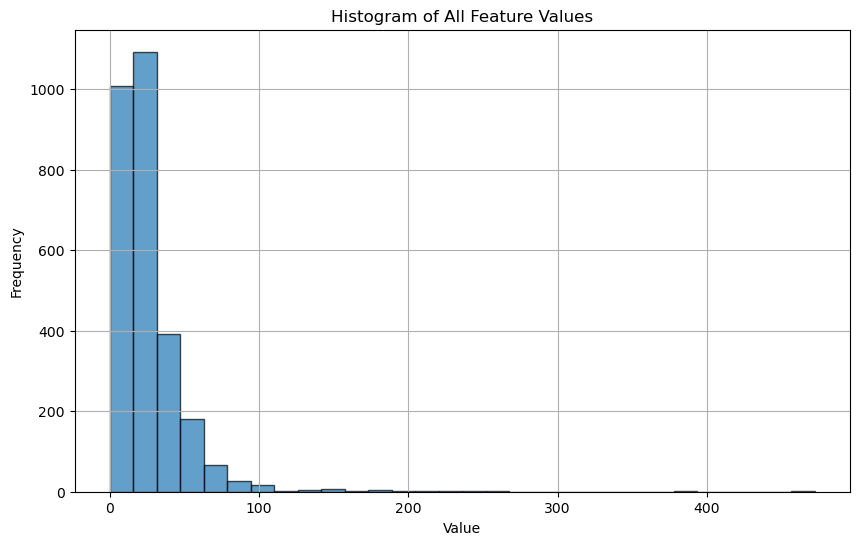

In [31]:
all_values = y.flatten()

# Plot histogram of all feature values
plt.figure(figsize=(10, 6))
plt.hist(all_values, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of All Feature Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

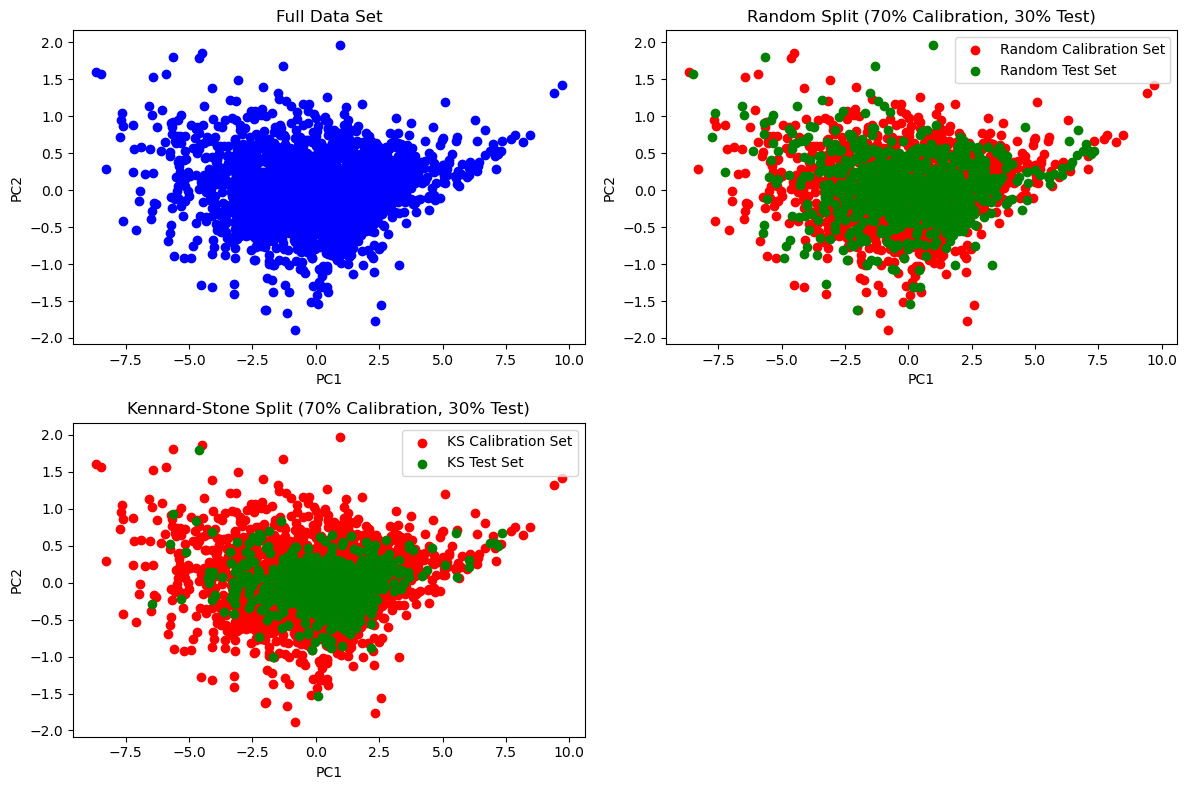

Random Split:
Calibration set shape: (1964, 1000)
Test set shape: (843, 1000)

Kennard-Stone Split:
Calibration set shape: (1964, 1000)
Test set shape: (843, 1000)


In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

# Step 1: Generate or Load Data
np.random.seed(42)  # Set seed for reproducibility


# Step 2: Random Split (70% Calibration, 30% Test)
X_cal_random, X_test_random = train_test_split(X, test_size=0.3, random_state=42)

# Step 3: Kennard-Stone Algorithm for Representative Sampling
def kennard_stone(X, n_samples):
    """Kennard-Stone algorithm to select a representative subset of samples."""
    n = X.shape[0]
    selected = np.zeros(n_samples, dtype=int)
    
    # Start with the two most distant samples
    dist_matrix = pairwise_distances(X)
    selected[0] = np.argmax(np.sum(dist_matrix, axis=1))
    selected[1] = np.argmax(dist_matrix[selected[0]])
    
    for i in range(2, n_samples):
        remaining = np.setdiff1d(np.arange(n), selected[:i])
        dist_to_selected = dist_matrix[remaining][:, selected[:i]]
        min_dist = np.min(dist_to_selected, axis=1)
        selected[i] = remaining[np.argmax(min_dist)]
    
    return selected

# Apply Kennard-Stone to select 70% of the data
n_cal = int(0.7 * X.shape[0])
ks_indices = kennard_stone(X, n_cal)
X_cal_ks = X[ks_indices]
X_test_ks = np.delete(X, ks_indices, axis=0)

# Step 4: PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # PCA on full data
X_cal_random_pca = pca.transform(X_cal_random)  # PCA on random calibration set
X_test_random_pca = pca.transform(X_test_random)  # PCA on random test set
X_cal_ks_pca = pca.transform(X_cal_ks)  # PCA on Kennard-Stone calibration set
X_test_ks_pca = pca.transform(X_test_ks)  # PCA on Kennard-Stone test set

# Step 5: Plot Results
plt.figure(figsize=(12, 8))

# Plot Full Data Set
plt.subplot(2, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', label='Full Data Set')
plt.title('Full Data Set')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Plot Random Split
plt.subplot(2, 2, 2)
plt.scatter(X_cal_random_pca[:, 0], X_cal_random_pca[:, 1], c='red', label='Random Calibration Set')
plt.scatter(X_test_random_pca[:, 0], X_test_random_pca[:, 1], c='green', label='Random Test Set')
plt.title('Random Split (70% Calibration, 30% Test)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# Plot Kennard-Stone Split
plt.subplot(2, 2, 3)
plt.scatter(X_cal_ks_pca[:, 0], X_cal_ks_pca[:, 1], c='red', label='KS Calibration Set')
plt.scatter(X_test_ks_pca[:, 0], X_test_ks_pca[:, 1], c='green', label='KS Test Set')
plt.title('Kennard-Stone Split (70% Calibration, 30% Test)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.tight_layout()
plt.show()

# Print Shapes of the Splits
print("Random Split:")
print(f"Calibration set shape: {X_cal_random.shape}")
print(f"Test set shape: {X_test_random.shape}")

print("\nKennard-Stone Split:")
print(f"Calibration set shape: {X_cal_ks.shape}")
print(f"Test set shape: {X_test_ks.shape}")

n_components: 1, RMSE (Random): 23.1882, RMSE (KS): 25.5640
n_components: 21, RMSE (Random): 16.0206, RMSE (KS): 16.9216
n_components: 41, RMSE (Random): 15.3859, RMSE (KS): 16.1740
n_components: 61, RMSE (Random): 15.6382, RMSE (KS): 16.3570
n_components: 81, RMSE (Random): 16.2499, RMSE (KS): 16.9322
n_components: 101, RMSE (Random): 16.7122, RMSE (KS): 17.6547
n_components: 121, RMSE (Random): 17.0939, RMSE (KS): 18.9933
n_components: 141, RMSE (Random): 17.8297, RMSE (KS): 19.9960
n_components: 161, RMSE (Random): 18.6262, RMSE (KS): 20.4488
n_components: 181, RMSE (Random): 18.8643, RMSE (KS): 20.8075
Rough estimate of optimal number of components (Random): 41
Rough estimate of optimal number of components (KS): 41


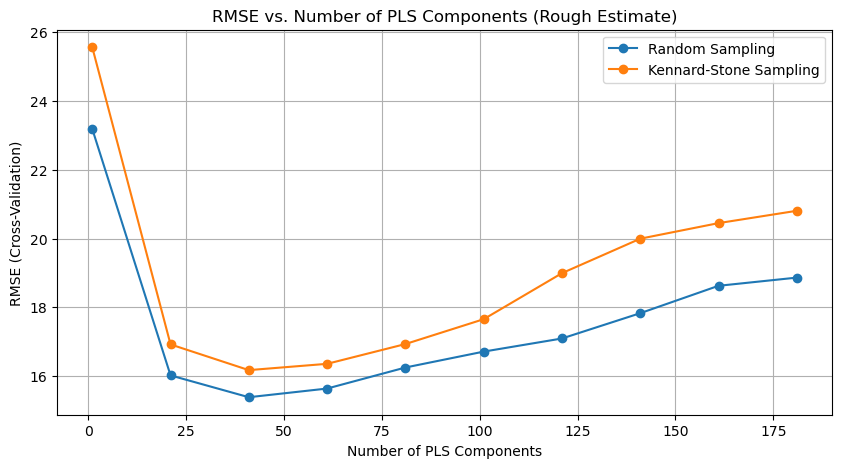

n_components: 31, RMSE (Random): 15.7423, RMSE (KS): 16.4903
n_components: 32, RMSE (Random): 15.7671, RMSE (KS): 16.4860
n_components: 33, RMSE (Random): 15.7317, RMSE (KS): 16.3844
n_components: 34, RMSE (Random): 15.5868, RMSE (KS): 16.3615
n_components: 35, RMSE (Random): 15.5135, RMSE (KS): 16.3349
n_components: 36, RMSE (Random): 15.5328, RMSE (KS): 16.3302
n_components: 37, RMSE (Random): 15.5015, RMSE (KS): 16.2605
n_components: 38, RMSE (Random): 15.4801, RMSE (KS): 16.2434
n_components: 39, RMSE (Random): 15.3968, RMSE (KS): 16.2095
n_components: 40, RMSE (Random): 15.3487, RMSE (KS): 16.1769
n_components: 41, RMSE (Random): 15.3859, RMSE (KS): 16.1740
n_components: 42, RMSE (Random): 15.4059, RMSE (KS): 16.1924
n_components: 43, RMSE (Random): 15.3606, RMSE (KS): 16.2422
n_components: 44, RMSE (Random): 15.4350, RMSE (KS): 16.3135
n_components: 45, RMSE (Random): 15.4517, RMSE (KS): 16.3359
n_components: 46, RMSE (Random): 15.4328, RMSE (KS): 16.3961
n_components: 47, RMSE (

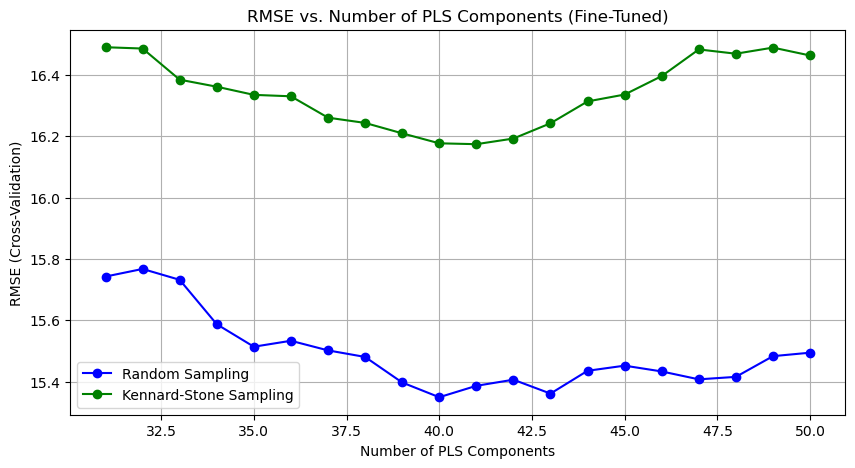

Root Mean Squared Error (RMSE) on test set (Random): 12.0266
Root Mean Squared Error (RMSE) on test set (KS): 8.1574
Correlation coefficient (Random): 0.7999
Correlation coefficient (KS): 0.8643


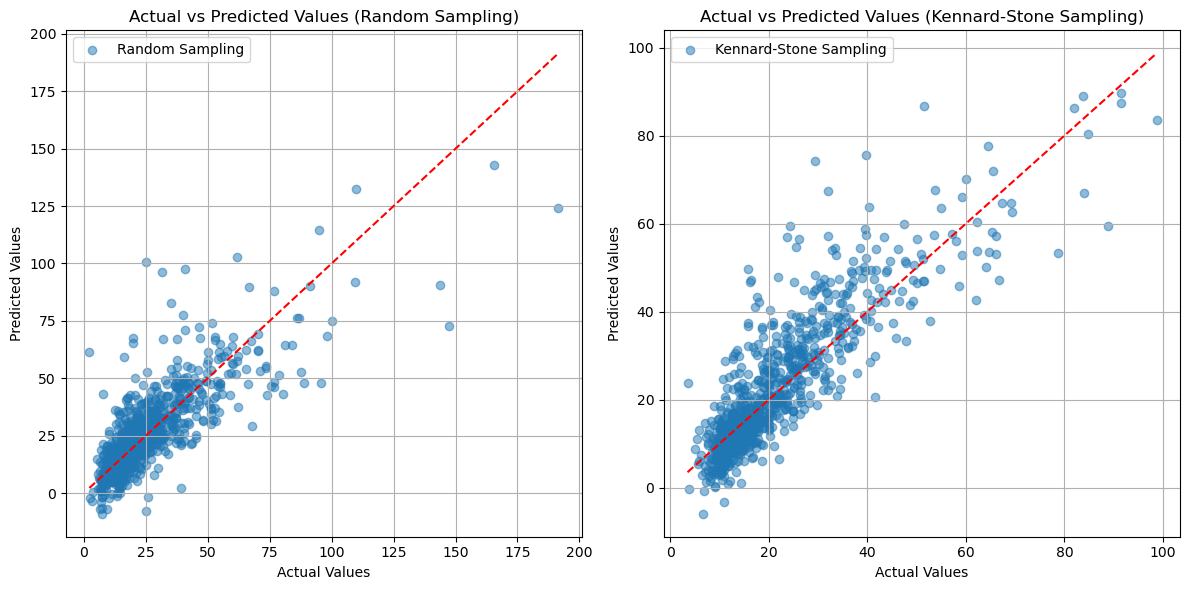

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

# Load data
data = pd.read_csv('France_spc.csv')
data = data.drop(columns=['Unnamed: 0'])

target = pd.read_csv('France_lab.csv')
target = target['SOC']

# Extract features and target
X = data.values
y = target.values

# Apply Savitzky-Golay smoothing filter
def apply_savitzky_golay(X, window_length=11, polyorder=2, deriv=0, delta=2):
    smoothed_X = savgol_filter(X, window_length=window_length, polyorder=polyorder, deriv=deriv, delta=delta, axis=0)
    return smoothed_X

# Apply Standard Normal Variate (SNV) transformation
def standard_normal_variate(X):
    snv_X = (X - np.mean(X, axis=1, keepdims=True)) / np.std(X, axis=1, keepdims=True)
    return snv_X

# Optionally apply Savitzky-Golay filter and SNV transformation
X_sg = apply_savitzky_golay(X, window_length=11, polyorder=2, deriv=0, delta=2)
X_snv = standard_normal_variate(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_snv)

# Kennard-Stone Algorithm for Representative Sampling
def kennard_stone(X, n_samples):
    """Kennard-Stone algorithm to select a representative subset of samples."""
    n = X.shape[0]
    selected = np.zeros(n_samples, dtype=int)
    
    # Start with the two most distant samples
    dist_matrix = pairwise_distances(X)
    selected[0] = np.argmax(np.sum(dist_matrix, axis=1))
    selected[1] = np.argmax(dist_matrix[selected[0]])
    
    for i in range(2, n_samples):
        remaining = np.setdiff1d(np.arange(n), selected[:i])
        dist_to_selected = dist_matrix[remaining][:, selected[:i]]
        min_dist = np.min(dist_to_selected, axis=1)
        selected[i] = remaining[np.argmax(min_dist)]
    
    return selected

# Split data into calibration (80%) and test (20%) sets using random sampling
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Split data into calibration (80%) and test (20%) sets using Kennard-Stone sampling
n_cal = int(0.7 * X_scaled.shape[0])
ks_indices = kennard_stone(X_scaled, n_cal)
X_train_ks = X_scaled[ks_indices]
y_train_ks = y[ks_indices]
X_test_ks = np.delete(X_scaled, ks_indices, axis=0)
y_test_ks = np.delete(y, ks_indices, axis=0)

# Function to calculate RMSE using cross-validation
def calculate_rmse(n_components, X_train, y_train):
    pls = PLSRegression(n_components=n_components)
    # Use negative mean squared error as cross-validation scoring
    mse = cross_val_score(pls, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-mse).mean()  # Take square root of MSE and average it across folds
    return rmse

# Test a range of n_components in larger increments
component_step = 20  # Test every 20 components for efficiency
max_components = min(X_train_random.shape[0], X_train_random.shape[1], 200)  # Ensure we don't test more components than features or samples
rmse_scores_random = []
rmse_scores_ks = []

for n in range(1, max_components + 1, component_step):
    rmse_random = calculate_rmse(n, X_train_random, y_train_random)
    rmse_ks = calculate_rmse(n, X_train_ks, y_train_ks)
    rmse_scores_random.append((n, rmse_random))
    rmse_scores_ks.append((n, rmse_ks))
    print(f'n_components: {n}, RMSE (Random): {rmse_random:.4f}, RMSE (KS): {rmse_ks:.4f}')

# Extract n_components and RMSE values
components_tested = [x[0] for x in rmse_scores_random]
rmse_values_random = [x[1] for x in rmse_scores_random]
rmse_values_ks = [x[1] for x in rmse_scores_ks]

# Find the range of n_components with the lowest RMSE
optimal_n_rough_random = components_tested[np.argmin(rmse_values_random)]
optimal_n_rough_ks = components_tested[np.argmin(rmse_values_ks)]
print(f'Rough estimate of optimal number of components (Random): {optimal_n_rough_random}')
print(f'Rough estimate of optimal number of components (KS): {optimal_n_rough_ks}')

# Plot RMSE vs. number of components (in steps)
plt.figure(figsize=(10, 5))
plt.plot(components_tested, rmse_values_random, marker='o', label='Random Sampling')
plt.plot(components_tested, rmse_values_ks, marker='o', label='Kennard-Stone Sampling')
plt.xlabel('Number of PLS Components')
plt.ylabel('RMSE (Cross-Validation)')
plt.title('RMSE vs. Number of PLS Components (Rough Estimate)')
plt.legend()
plt.grid(True)
plt.show()

# Fine-tune around the rough estimate
fine_tune_range = list(range(max(1, optimal_n_rough_random - 10), min(max_components, optimal_n_rough_random + 10)))

fine_rmse_scores_random = []
fine_rmse_scores_ks = []

for n in fine_tune_range:
    rmse_random = calculate_rmse(n, X_train_random, y_train_random)
    rmse_ks = calculate_rmse(n, X_train_ks, y_train_ks)
    fine_rmse_scores_random.append((n, rmse_random))
    fine_rmse_scores_ks.append((n, rmse_ks))
    print(f'n_components: {n}, RMSE (Random): {rmse_random:.4f}, RMSE (KS): {rmse_ks:.4f}')

# Extract refined n_components and RMSE values
fine_components_tested = [x[0] for x in fine_rmse_scores_random]
fine_rmse_values_random = [x[1] for x in fine_rmse_scores_random]
fine_rmse_values_ks = [x[1] for x in fine_rmse_scores_ks]

# Find the optimal number of components with the lowest RMSE in the fine-tuned range
optimal_n_fine_random = fine_components_tested[np.argmin(fine_rmse_values_random)]
optimal_n_fine_ks = fine_components_tested[np.argmin(fine_rmse_values_ks)]
print(f'Fine-tuned optimal number of components (Random): {optimal_n_fine_random}')
print(f'Fine-tuned optimal number of components (KS): {optimal_n_fine_ks}')

# Plot RMSE vs. number of components (fine-tuned)
plt.figure(figsize=(10, 5))
plt.plot(fine_components_tested, fine_rmse_values_random, marker='o', color='blue', label='Random Sampling')
plt.plot(fine_components_tested, fine_rmse_values_ks, marker='o', color='green', label='Kennard-Stone Sampling')
plt.xlabel('Number of PLS Components')
plt.ylabel('RMSE (Cross-Validation)')
plt.title('RMSE vs. Number of PLS Components (Fine-Tuned)')
plt.legend()
plt.grid(True)
plt.show()

# Now use the fine-tuned optimal number of components in your final PLS model
pls_random = PLSRegression(n_components=optimal_n_fine_random)
pls_random.fit(X_train_random, y_train_random)

pls_ks = PLSRegression(n_components=optimal_n_fine_ks)
pls_ks.fit(X_train_ks, y_train_ks)

# Make predictions on the test set
y_pred_random = pls_random.predict(X_test_random).squeeze()
y_pred_ks = pls_ks.predict(X_test_ks).squeeze()

# Calculate test RMSE
rmse_random = np.sqrt(mean_squared_error(y_test_random, y_pred_random))
rmse_ks = np.sqrt(mean_squared_error(y_test_ks, y_pred_ks))
print(f'Root Mean Squared Error (RMSE) on test set (Random): {rmse_random:.4f}')
print(f'Root Mean Squared Error (RMSE) on test set (KS): {rmse_ks:.4f}')

# Calculate correlation coefficient
correlation_random, _ = pearsonr(y_test_random, y_pred_random)
correlation_ks, _ = pearsonr(y_test_ks, y_pred_ks)
print(f'Correlation coefficient (Random): {correlation_random:.4f}')
print(f'Correlation coefficient (KS): {correlation_ks:.4f}')

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test_random, y_pred_random, alpha=0.5, label='Random Sampling')
plt.plot([min(y_test_random), max(y_test_random)], [min(y_test_random), max(y_test_random)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Random Sampling)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test_ks, y_pred_ks, alpha=0.5, label='Kennard-Stone Sampling')
plt.plot([min(y_test_ks), max(y_test_ks)], [min(y_test_ks), max(y_test_ks)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Kennard-Stone Sampling)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [35]:
X_train_ks.shape

(1964, 1000)

In [36]:
X_test_ks.shape

(843, 1000)

In [37]:
X_test.shape

(562, 1000)

In [39]:
y_train_ks

array([18.8, 69.9, 22.2, ...,  8.6, 12.5, 31.6])

In [40]:
y_test_ks

array([15.6, 33.5, 66.1, 51.5, 43.2, 33.8,  7.9, 24.5, 15. , 31.2, 10.7,
       27.5, 83.7,  9.9,  9.7, 31. , 26.8, 36.7, 25.6, 36.4, 27.7, 40. ,
       11.1, 23.8, 31.8, 14.4, 21.2, 40.8, 21. , 12.4, 12.5, 17.3, 21.5,
        9.3, 17. , 18.8, 49.3, 37. , 20.1, 13.2, 11.1, 34. , 24.4, 64.4,
       11.2, 16.5, 10.7, 10. , 11. , 11.9, 24.9,  8.4, 11.1,  7.1, 12.1,
       15.3, 10.4, 11.7, 16.8, 20.1, 13.3, 20.1, 14.1, 12.2,  8.2, 10.6,
       13.7,  9.8, 13.1, 10.6, 10.8, 18.5,  5.9, 10.4, 10.3,  7.8,  7.6,
       12. ,  9.3, 11. , 11.9, 14.5,  9.2, 15.7, 10.6, 14.4,  9.7, 12. ,
       11.4,  8.9,  9.7,  9.9, 11.9, 11.2, 17.8,  9.9, 41.6, 31.5, 36. ,
       26.5, 33.8, 26.3, 41.9, 10.8,  9.4, 25.9, 14.8, 13.4, 20.9, 13.3,
       27.7, 34.4, 25. , 14.3, 32.3,  7.6, 12.7, 12.9, 14.1, 26.2, 10.1,
       13.1, 23.1, 15.4, 17.6, 16.7, 22. , 12.8, 13.5, 10.8, 21.4, 10.1,
       11.8, 13.5, 11.9, 10.9, 10.2, 17.6, 10.2, 11.4, 21. , 10.3, 16. ,
       11.3, 35.2, 34.5, 39.8, 20.3, 31.1, 34.1, 23

In [52]:
X_test_random.shape


(843, 1000)

In [47]:
X_test_tensor.shape

torch.Size([1964, 30])

In [55]:
y_test.shape

(1965,)

Epoch [10/3000], Loss: 1541.1589
Epoch [20/3000], Loss: 1371.1769
Epoch [30/3000], Loss: 1111.4764
Epoch [40/3000], Loss: 992.7308
Epoch [50/3000], Loss: 920.7314
Epoch [60/3000], Loss: 867.6029
Epoch [70/3000], Loss: 829.0676
Epoch [80/3000], Loss: 801.7560
Epoch [90/3000], Loss: 782.7998
Epoch [100/3000], Loss: 769.9469
Epoch [110/3000], Loss: 761.4509
Epoch [120/3000], Loss: 755.9891
Epoch [130/3000], Loss: 752.5815
Epoch [140/3000], Loss: 750.5224
Epoch [150/3000], Loss: 749.3193
Epoch [160/3000], Loss: 748.6407
Epoch [170/3000], Loss: 748.2715
Epoch [180/3000], Loss: 748.0784
Epoch [190/3000], Loss: 747.9810
Epoch [200/3000], Loss: 747.9335
Epoch [210/3000], Loss: 747.9106
Epoch [220/3000], Loss: 747.8999
Epoch [230/3000], Loss: 747.8942
Epoch [240/3000], Loss: 747.8898
Epoch [250/3000], Loss: 747.7160
Epoch [260/3000], Loss: 747.0860
Epoch [270/3000], Loss: 746.9802
Epoch [280/3000], Loss: 746.7087
Epoch [290/3000], Loss: 746.6811
Epoch [300/3000], Loss: 746.5679
Epoch [310/3000]

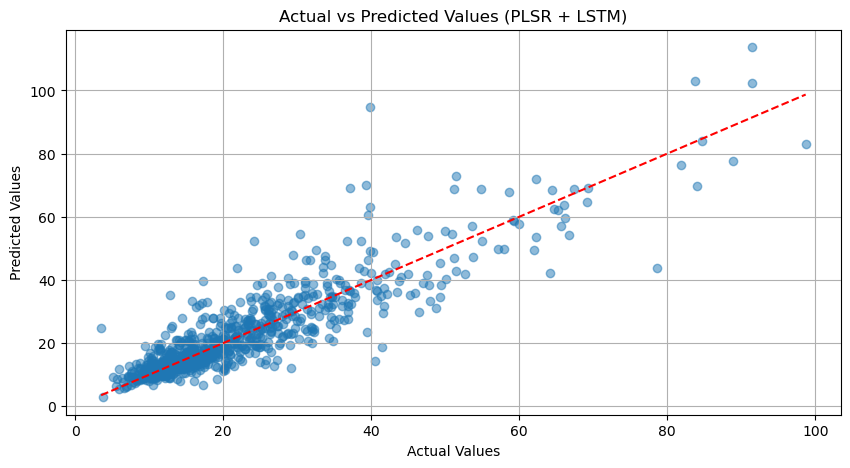

In [62]:
X_train = X_train_ks
X_test = X_test_ks
y_train = y_train_ks
y_test = y_test_ks




# Define the PLS Regression model for dimensionality reduction
n_components = min(40, X_train.shape[1])  # Adjust based on your data; 10 is an example
pls = PLSRegression(n_components=n_components)

# Fit PLSR on the training data and transform both training and test sets
#X_train_pls = pls.fit_transform(X_train, y_train)[0]
#X_test_pls = pls.transform(X_test)# check using traning data


# Fit PLSR on the training data and transform the training set
X_train_pls, _ = pls.fit_transform(X_train, y_train)

# Transform the test set using the fitted model (trained on the training set)
X_test_pls = pls.transform(X_test)


#pls  scores loading regression coeffieicent latent  variables , 

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_pls, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_pls, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # LSTM layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        # Fully connected layer
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # Initialize hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward pass through LSTM layer
        out, _ = self.lstm(x, (h0, c0))
        # Select the last time step
        out = out[:, -1, :]
        # Forward pass through fully connected layer
        out = self.fc(out)
        return out

# Hyperparameters
input_size = X_train_pls.shape[1]  # Number of features after PLSR
hidden_size = 256
output_size = 1  # For regression
num_layers = 5
num_epochs = 3000
learning_rate = 0.001

# Initialize the model, loss function, and optimizer
model = LSTMModel(input_size, hidden_size, output_size, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    
    # Forward pass
    outputs = model(X_train_tensor.unsqueeze(1))  # Add sequence dimension
    loss = criterion(outputs.squeeze(), y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    # Make predictions on the test set
    predictions = model(X_test_tensor.unsqueeze(1)).squeeze()
    
    # Calculate test loss
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')
    
    # Convert predictions and y_test to numpy arrays
    y_pred_np = predictions.numpy()
    y_test_np = y_test_tensor.numpy()

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test_np, y_pred_np))
    print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
    
    # Calculate correlation coefficient
    correlation, _ = pearsonr(y_test_np, y_pred_np)
    print(f'Correlation coefficient: {correlation:.4f}')
    
    # Plot actual vs. predicted values
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test_np, y_pred_np, alpha=0.5)
    plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='red', linestyle='--')  # Perfect prediction line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values (PLSR + LSTM)')
    plt.grid(True)
    plt.show()

In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.signal import savgol_filter
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

Epoch [10/2000], Loss: 1528.6924
Epoch [20/2000], Loss: 1264.0912
Epoch [30/2000], Loss: 1087.0963
Epoch [40/2000], Loss: 989.5828
Epoch [50/2000], Loss: 921.7462
Epoch [60/2000], Loss: 871.0187
Epoch [70/2000], Loss: 833.5483
Epoch [80/2000], Loss: 806.3646
Epoch [90/2000], Loss: 787.0134
Epoch [100/2000], Loss: 773.5204
Epoch [110/2000], Loss: 764.3248
Epoch [120/2000], Loss: 758.2126
Epoch [130/2000], Loss: 754.2576
Epoch [140/2000], Loss: 751.7698
Epoch [150/2000], Loss: 750.2501
Epoch [160/2000], Loss: 749.3461
Epoch [170/2000], Loss: 748.7788
Epoch [180/2000], Loss: 748.4014
Epoch [190/2000], Loss: 748.0467
Epoch [200/2000], Loss: 746.0026
Epoch [210/2000], Loss: 736.2944
Epoch [220/2000], Loss: 697.7112
Epoch [230/2000], Loss: 662.1270
Epoch [240/2000], Loss: 635.5792
Epoch [250/2000], Loss: 611.2576
Epoch [260/2000], Loss: 588.0775
Epoch [270/2000], Loss: 569.7994
Epoch [280/2000], Loss: 551.0995
Epoch [290/2000], Loss: 531.8274
Epoch [300/2000], Loss: 516.9656
Epoch [310/2000]

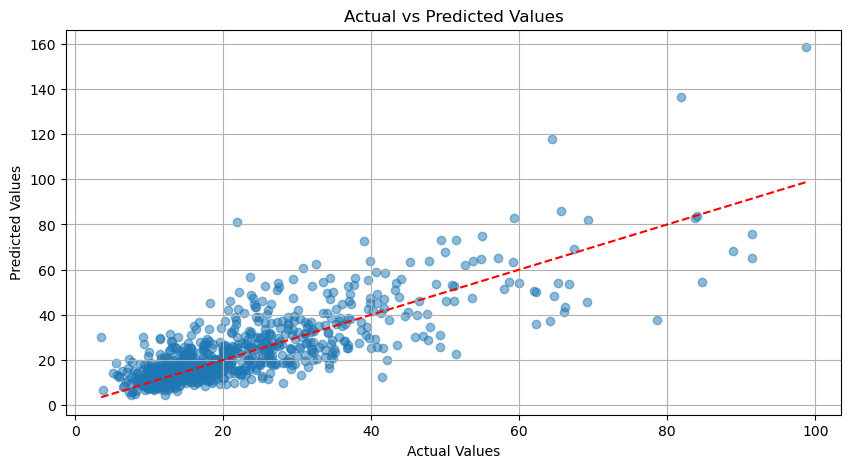

In [64]:




# Normalize features
scaler = StandardScaler()

#X_pca_scaled = scaler.fit_transform(X)


# Split data into training and test sets

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # LSTM layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        # Fully connected layer
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # Initialize hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward pass through LSTM layer
        out, _ = self.lstm(x, (h0, c0))
        # Select the last time step
        out = out[:, -1, :]
        # Forward pass through fully connected layer
        out = self.fc(out)
        return out

# Hyperparameters
input_size = X_train.shape[1]  # Number of features after PCA and scaling
hidden_size = 256
output_size = 1  # For regression
num_layers = 5
num_epochs = 2000
learning_rate = 0.001

# Initialize the model, loss function, and optimizer
model = LSTMModel(input_size, hidden_size, output_size, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    
    # Forward pass
    outputs = model(X_train.unsqueeze(1))  # Add sequence dimension
    loss = criterion(outputs.squeeze(), y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    # Make predictions on the test set
    predictions = model(X_test.unsqueeze(1)).squeeze()
    
    # Calculate test loss
    test_loss = criterion(predictions, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')
    
    # Convert predictions and y_test to numpy arrays
    y_pred_np = predictions.numpy()
    y_test_np = y_test.numpy()

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test_np, y_pred_np))
    print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
    
    # Calculate correlation coefficient
    correlation, _ = pearsonr(y_test_np, y_pred_np)
    print(f'Correlation coefficient: {correlation:.4f}')
    
    # Plot actual vs. predicted values
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test_np, y_pred_np, alpha=0.5)
    plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='red', linestyle='--')  # Perfect prediction line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.grid(True)
    plt.show()